# Lets see whats inside the CyclicLR callback of Keras 
https://github.com/keras-team/keras-contrib/blob/master/keras_contrib/callbacks/cyclical_learning_rate.py

In [151]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

#num of lr generated before reaching a half-cycle/half-triangle
step_size=8
#starting/minimum lr 
base_lr=1e-7
#maximum lr
max_lr=1e-2
#for triangle, scaling is unity. can be altered for exponential traingles
scale_fn=lambda x: 1.0
print ('interval:{}'.format(max_lr-base_lr))

interval:0.0099999


In [154]:
''''
the train_step refers to num of batch of n_cycles completed
for ex: if batch_size=32, a train_step of 3200 will be 101 th generated lr from cyclicLR

'''
def clr(train_step):
    
        #a full traingle has 2*stepsize , so the cycle is [1+completed_train_step/(2*step_size)] 
        
        cycle = np.floor(1 + train_step / (2 * step_size))
        
        #new_lr
        x = np.abs(train_step / step_size - 2 * cycle + 1)

        #updated_lr==> new_lr added to base_lr weighted by interval and scaled by unity
        
        return base_lr + (max_lr - base_lr) * np.maximum(0, (1 - x)) * scale_fn(cycle)

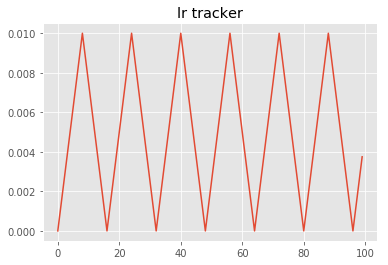

In [155]:
#lets plot some stufff
lr=[]
for i in range(0,100):
    #print('{}:{}'.format(i,clr(float(i))))
    lr.append(clr(float(i)))
plt.title('lr tracker')
plt.plot(lr)

Lets check if lr from cyclicLR is deterministic --- it should probably be as we change only train_step in cyclicLR func

In [153]:
np.random.seed(10)
args=float(np.random.randint(low=0,high=100000,size=(1,))[0])
print ('train_step:{} cyclic_lr:{}|'.format(args,clr(args)))

0.125
train_step:83209.0 cyclic_lr:0.0087500125|


Yes it is deterministic !!!!!!, i have added implementation notebook, you can get started with cyclicLR with standard cifar10 classification there.